In [3]:
import os
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix

ROOT_DIR = os.getcwd()  # .../somalogic
DAT_DIR = os.path.join(ROOT_DIR, 'results', 'datasets')  # .../somalogic/results/datasets
TEST_DIR = os.path.join(DAT_DIR, 'test')  # .../somalogic/results/datasets/test

data = 'infe'
X_choices = ['baseline', 'all_proteins']

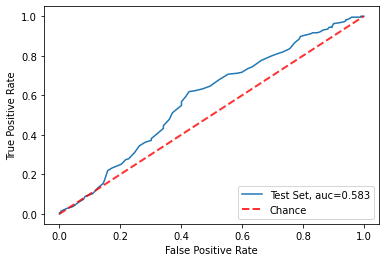

[[127  75]
 [105 110]]


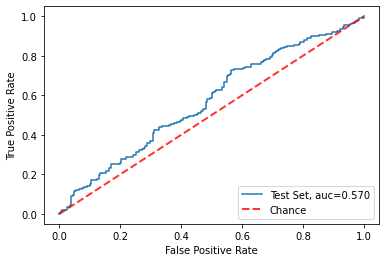

[[  9 193]
 [  8 207]]


In [6]:
outcome = 'A3'
for X_choice in X_choices:
    file_name = os.path.join(TEST_DIR, f'{data}_{outcome}_{X_choice}_test_results.pkl')

    with open(file_name, "rb") as fp:  # Unpickling
        test_dict = pickle.load(fp)

    # print(test_dict)

    y = test_dict['y']
    y_pred_proba = test_dict['y_pred_proba']
    y_pred = test_dict['y_pred']
    fpr = test_dict['fpr']
    tpr = test_dict['tpr']

    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.plot(fpr, tpr, label="Test Set, auc=" + "{:.3f}".format(auc))  # plot roc curve
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)  # plot diagonal line
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    fig_path = os.path.join(TEST_DIR, f'{data}_{outcome}_{X_choice}_auc_curve.png')
    plt.savefig(fig_path, bbox_inches='tight')
    plt.show()

    cf_matrix = confusion_matrix(y, y_pred)
    print(cf_matrix)